In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Input, models, layers, optimizers, metrics
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.applications import VGG16

In [3]:
np.random.seed(3)
tf.compat.v1.set_random_seed(3)

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   horizontal_flip=True,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1, 
                                   fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
'train',
target_size=(150, 150),
batch_size=5,
class_mode='binary')

test_datagen = ImageDataGenerator(rescale=1./255,
                                 horizontal_flip=True,
                                 width_shift_range=0.1,
                                 height_shift_range=0.1,
                                 fill_mode='nearest')

test_generator = test_datagen.flow_from_directory('test', target_size=(150, 150),
                                                   batch_size=5, class_mode='binary')

Found 160 images belonging to 2 classes.
Found 120 images belonging to 2 classes.


In [5]:
transfer_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
transfer_model.trainable = False
transfer_model.summary()
finetune_model = models.Sequential()
finetune_model.add(transfer_model)
finetune_model.add(Flatten())
finetune_model.add(Dense(64, activation='relu'))
finetune_model.add(Dense(2, activation='softmax'))
finetune_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

Epoch 1/20
100/100 [==============================] - 115s 1s/step - loss: 0.4517 - accuracy: 0.8180 - val_loss: 0.3574 - val_accuracy: 0.8500
Epoch 2/20
100/100 [==============================] - 113s 1s/step - loss: 0.2009 - accuracy: 0.9520 - val_loss: 0.2492 - val_accuracy: 0.8500
Epoch 3/20
100/100 [==============================] - 120s 1s/step - loss: 0.1481 - accuracy: 0.9660 - val_loss: 0.2483 - val_accuracy: 0.8500
Epoch 4/20
100/100 [==============================] - 117s 1s/step - loss: 0.1163 - accuracy: 0.9500 - val_loss: 0.0914 - val_accuracy: 1.0000
Epoch 5/20
100/100 [==============================] - 112s 1s/step - loss: 0.1142 - accuracy: 0.9680 - val_loss: 0.1224 - val_accuracy: 0.9500
Epoch 6/20
100/100 [==============================] - 114s 1s/step - loss: 0.0839 - accuracy: 0.9720 - val_loss: 0.1104 - val_accuracy: 0.9500
Epoch 7/20
100/100 [==============================] - 113s 1s/step - loss: 0.0680 - accuracy: 0.9840 - val_loss: 0.0765 - val_accuracy: 1.0000

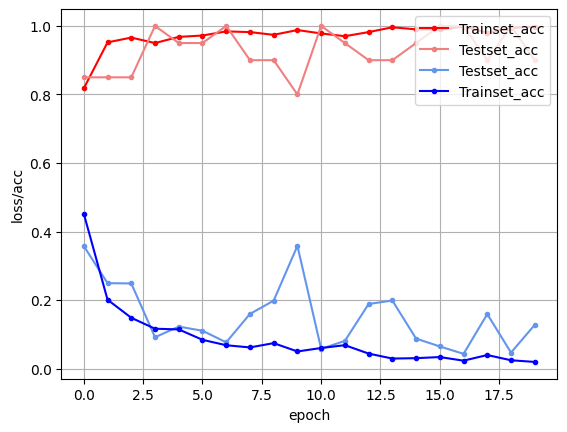

In [6]:
# 모델 컴파일
finetune_model.compile(loss='sparse_categorical_crossentropy', 
                       optimizer=optimizers.Adam(learning_rate=0.0002),
                       metrics=['accuracy'])

history = finetune_model.fit_generator(train_generator, steps_per_epoch=100, epochs=20,
                                       validation_data=test_generator, validation_steps=4)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, acc, marker='.', c="red", label='Trainset_acc')
plt.plot(x_len, val_acc, marker='.', c="lightcoral", label='Testset_acc')
plt.plot(x_len, y_vloss, marker='.', c="cornflowerblue", label='Testset_acc')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_acc')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss/acc')
plt.show()